# What is Survival Analysis?
 
Survival analysis is a branch of statistics that deals with analyzing the expected duration of time until one or more events happen, such as death in biological organisms or failure in mechanical systems. It is commonly used in medical research to study the time until patients experience an event of interest (e.g., death, relapse, recovery).
 
Key features of survival analysis include:
 - **Time-to-event data:** The main variable of interest is the time until an event occurs.
 - **Censoring:** Not all subjects may experience the event during the study period; for these subjects, we only know that the event has not occurred up to a certain time.
 - **Survival function:** Estimates the probability that the event of interest has not occurred by a certain time.
 - **Hazard function:** Describes the instantaneous rate at which the event occurs, given survival up to that time.
 
Survival analysis methods are widely used in clinical trials, reliability engineering, and many other fields where time-to-event data is important.


## Understanding Survival analysis

As an example, consider a clinical study, which investigates cardiovascular disease and has been carried out over a 1 year period as in the figure below.

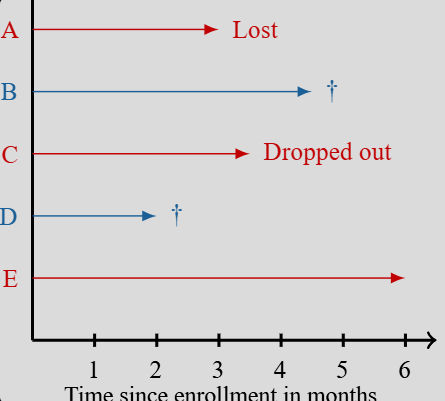

- **Patient A** was lost to follow-up after three months with no recorded cardiovascular event.
- **Patient B** experienced an event four and a half months after enrollment.
- **Patient C** withdrew from the study three and a half months after enrollment.
- **Patient E** did not experience any event before the study ended. 

**Uncensored**

The exact time of a cardiovascular event could only be recorded for patients B and D; their records are uncensored. 

**Censored**

For the remaining patients it is unknown whether they did or did not experience an event after termination of the study. The only valid information that is available for patients A, C, and E is that they were event-free up to their last follow-up. Therefore, their records are censored.

## Use Cases of Survival Analysis

 Survival analysis is widely used in various fields to analyze time-to-event data. Some common use cases include:
 
 - **Medical Research:** Estimating patient survival times, comparing effectiveness of treatments, and identifying risk factors for diseases (e.g., cancer, heart disease).
 - **Clinical Trials:** Assessing the time until a clinical event (such as relapse, recovery, or death) occurs in different treatment groups.
 - **Reliability Engineering:** Predicting the time until failure of mechanical or electronic components and systems.
 - **Customer Churn Analysis:** Modeling the time until a customer leaves a service or subscription.
 - **Sociology and Demography:** Studying time until events such as marriage, divorce, or job change.
 - **Economics and Finance:** Analyzing time to default on loans or bankruptcy.
 - **Insurance:** Estimating time until claims or policy lapses.
 
 In all these cases, survival analysis helps to understand not just if an event happens, but when it is likely to happen, even when some observations are censored (i.e., the event has not occurred for all subjects during the study period).


## Assumptions in Survival Analysis
 
When performing survival analysis, several key assumptions are typically made:
 
 1. **Independent Censoring:** The reason for censoring (e.g., loss to follow-up) is unrelated to the likelihood of the event occurring after censoring. In other words, censored subjects have the same future risk as those remaining under observation.
 
 2. **Time-to-Event is Precisely Measured:** The exact time of the event or censoring is known and accurately recorded.
 
 3. **Proportional Hazards (for Cox models):** The ratio of hazard rates between groups is constant over time (i.e., the effect of covariates does not change with time).
 
 4. **Independent Observations:** The survival times of different individuals are independent of each other.
 
 5. **Correct Model Specification:** The chosen statistical model correctly represents the relationship between covariates and survival time.
 
 Violations of these assumptions can lead to biased or invalid results, so it is important to check and justify them in any survival analysis.


# The Veterans’ Administration Lung Cancer Trial

The Veterans’ Administration Lung Cancer Trial is a randomized trial of two treatment regimens for lung cancer. The data set (Kalbfleisch J. and Prentice R, (1980) The Statistical Analysis of Failure Time Data. New York: Wiley) consists of 137 patients and 8 variables, which are described below:

Treatment: denotes the type of lung cancer treatment; standard and test drug.

Celltype: denotes the type of cell involved; squamous, small cell, adeno, large.

Karnofsky_score: is the Karnofsky score.

Diag: is the time since diagnosis in months.

Age: is the age in years.

Prior_Therapy: denotes any prior therapy; none or yes.

Status: denotes the status of the patient as dead or alive; dead or alive.

Survival_in_days: is the survival time in days since the treatment.

Our primary interest is studying whether there are subgroups that differ in survival and whether we can predict survival times.


This notebook is based on https://scikit-survival.readthedocs.io/en/stable/user_guide/00-introduction.html#Multivariate-Survival-Models

In [2]:
from sksurv.datasets import load_veterans_lung_cancer

data_x, data_y = load_veterans_lung_cancer()
data_y

array([( True,  72.), ( True, 411.), ( True, 228.), ( True, 126.),
       ( True, 118.), ( True,  10.), ( True,  82.), ( True, 110.),
       ( True, 314.), (False, 100.), ( True,  42.), ( True,   8.),
       ( True, 144.), (False,  25.), ( True,  11.), ( True,  30.),
       ( True, 384.), ( True,   4.), ( True,  54.), ( True,  13.),
       (False, 123.), (False,  97.), ( True, 153.), ( True,  59.),
       ( True, 117.), ( True,  16.), ( True, 151.), ( True,  22.),
       ( True,  56.), ( True,  21.), ( True,  18.), ( True, 139.),
       ( True,  20.), ( True,  31.), ( True,  52.), ( True, 287.),
       ( True,  18.), ( True,  51.), ( True, 122.), ( True,  27.),
       ( True,  54.), ( True,   7.), ( True,  63.), ( True, 392.),
       ( True,  10.), ( True,   8.), ( True,  92.), ( True,  35.),
       ( True, 117.), ( True, 132.), ( True,  12.), ( True, 162.),
       ( True,   3.), ( True,  95.), ( True, 177.), ( True, 162.),
       ( True, 216.), ( True, 553.), ( True, 278.), ( True,  1

In [5]:
data_x

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
0,69.0,squamous,60.0,7.0,no,standard
1,64.0,squamous,70.0,5.0,yes,standard
2,38.0,squamous,60.0,3.0,no,standard
3,63.0,squamous,60.0,9.0,yes,standard
4,65.0,squamous,70.0,11.0,yes,standard
...,...,...,...,...,...,...
132,65.0,large,75.0,1.0,no,test
133,64.0,large,60.0,5.0,no,test
134,67.0,large,70.0,18.0,yes,test
135,65.0,large,80.0,4.0,no,test


In [3]:
import pandas as pd

pd.DataFrame.from_records(data_y[[11, 5, 32, 13, 23]], index=range(1, 6))

,Status,Survival_in_days
1,True,8.0
2,True,10.0
3,True,20.0
4,False,25.0
5,True,59.0


Formula:

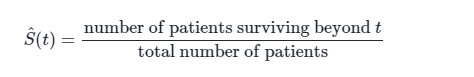

Using the formula from above, we can compute 

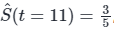
 
but not 

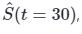

because we don’t know whether the 4th patient is still alive at all we know is that when we last checked at  the patient was still alive.

# Survival analysis using Kaplan–Meier estimator

notes:

1. it doesn't take any independent variable into consideration
2. it is non parametric as it does not consider independent variables, but only size of dependent variable

Text(0.5, 0, 'time $t$')

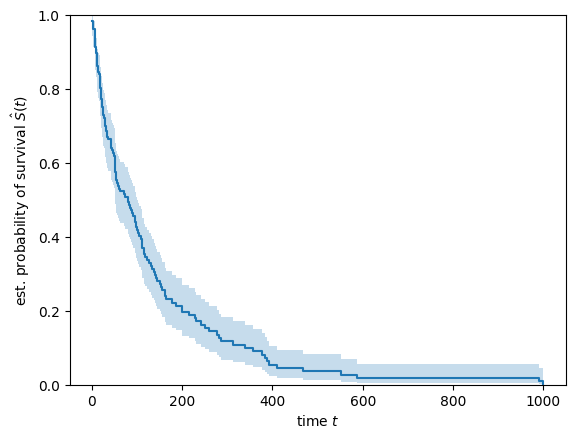

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob, conf_int = kaplan_meier_estimator(
    data_y["Status"], data_y["Survival_in_days"], conf_type="log-log"
)
plt.step(time, survival_prob, where="post")
plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
plt.ylim(0, 1)
plt.ylabel(r"est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

The estimated curve is a step function, with steps occurring at time points where one or more patients died. From the plot we can see that most patients died in the first 200 days, as indicated by the steep slope of the estimated survival function in the first 200 days.

# Survival functions by treatment
Patients enrolled in the Veterans’ Administration Lung Cancer Trial were randomized to one of two treatments: standard and a new test drug. Next, let’s have a look at how many patients underwent the standard treatment and how many received the new drug.

In [6]:
data_x["Treatment"].value_counts()


Treatment
standard    69
test        68
Name: count, dtype: int64

Roughly half the patients received the alternative treatment.

The obvious questions to ask is: > Is there any difference in survival between the two treatment groups?

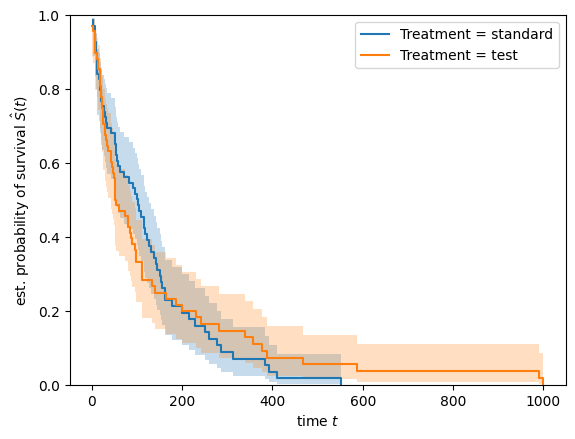

In [7]:
for treatment_type in ("standard", "test"):
    mask_treat = data_x["Treatment"] == treatment_type
    time_treatment, survival_prob_treatment, conf_int = kaplan_meier_estimator(
        data_y["Status"][mask_treat],
        data_y["Survival_in_days"][mask_treat],
        conf_type="log-log",
    )

    plt.step(time_treatment, survival_prob_treatment, where="post", label=f"Treatment = {treatment_type}")
    plt.fill_between(time_treatment, conf_int[0], conf_int[1], alpha=0.25, step="post")

plt.ylim(0, 1)
plt.ylabel(r"est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

Unfortunately, the results are inconclusive, because the difference between the two estimated survival functions is too small to confidently argue that the drug affects survival or not.

# Multivariate Survival Models

As Kaplan-Meier approach doesn't take any independent variable into account, we can use a linear model, Cox’s proportional hazard’s model, to estimate the impact each variable has on survival.

### Cox model or cox proportional hazar model

In [9]:
from sksurv.preprocessing import OneHotEncoder

data_x_numeric = OneHotEncoder().fit_transform(data_x)
data_x_numeric.head()

,Age_in_years,Celltype=large,Celltype=smallcell,Celltype=squamous,Karnofsky_score,Months_from_Diagnosis,Prior_therapy=yes,Treatment=test
0,69.0,0.0,0.0,1.0,60.0,7.0,0.0,0.0
1,64.0,0.0,0.0,1.0,70.0,5.0,1.0,0.0
2,38.0,0.0,0.0,1.0,60.0,3.0,0.0,0.0
3,63.0,0.0,0.0,1.0,60.0,9.0,1.0,0.0
4,65.0,0.0,0.0,1.0,70.0,11.0,1.0,0.0


In [10]:
from sklearn import set_config
from sksurv.linear_model import CoxPHSurvivalAnalysis

set_config(display="text")  # displays text representation of estimators

estimator = CoxPHSurvivalAnalysis()
estimator.fit(data_x_numeric, data_y)

CoxPHSurvivalAnalysis()

Formula for Cox model:

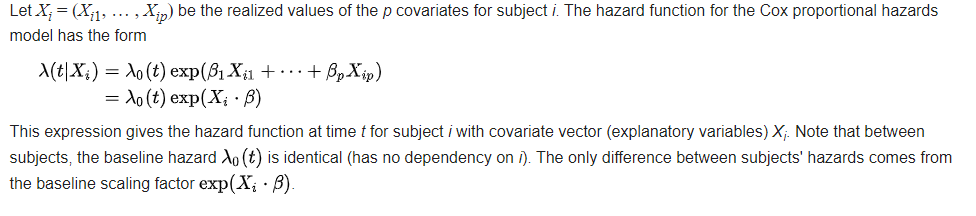

### why is it proportional model

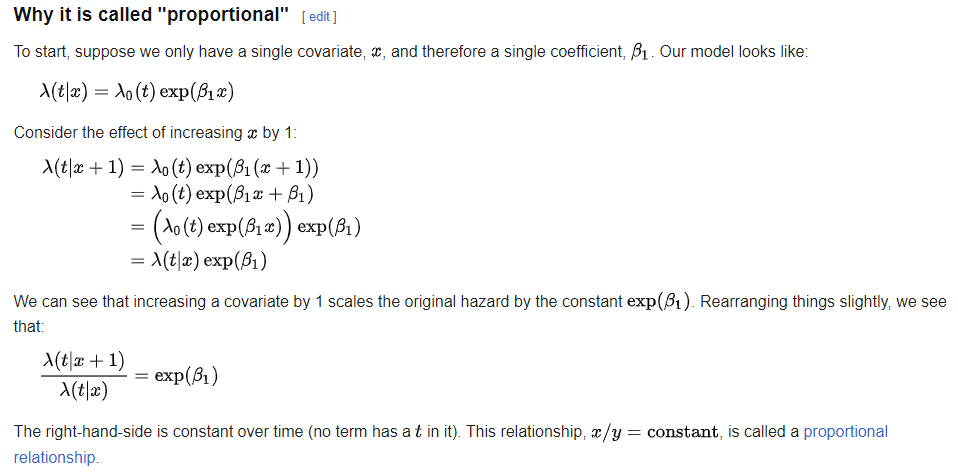

### example: single covariate cox model

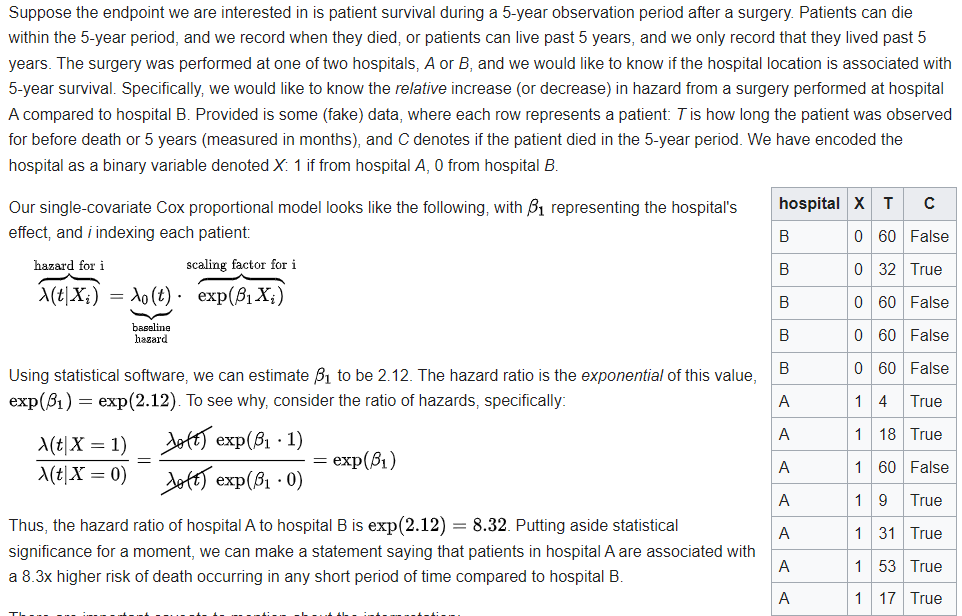

In [13]:
# feature impartance

pd.Series(estimator.coef_, index=data_x_numeric.columns)


Age_in_years            -0.008549
Celltype=large          -0.788672
Celltype=smallcell      -0.331813
Celltype=squamous       -1.188299
Karnofsky_score         -0.032622
Months_from_Diagnosis   -0.000092
Prior_therapy=yes        0.072327
Treatment=test           0.289936
dtype: float64

Using the fitted model, we can predict a patient-specific survival function, by passing an appropriate data matrix to the estimator’s predict_survival_function method.

In [14]:
x_new = pd.DataFrame.from_dict(
    {
        1: [65, 0, 0, 1, 60, 1, 0, 1],
        2: [65, 0, 0, 1, 60, 1, 0, 0],
        3: [65, 0, 1, 0, 60, 1, 0, 0],
        4: [65, 0, 1, 0, 60, 1, 0, 1],
    },
    columns=data_x_numeric.columns,
    orient="index",
)
x_new

,Age_in_years,Celltype=large,Celltype=smallcell,Celltype=squamous,Karnofsky_score,Months_from_Diagnosis,Prior_therapy=yes,Treatment=test
1,65,0,0,1,60,1,0,1
2,65,0,0,1,60,1,0,0
3,65,0,1,0,60,1,0,0
4,65,0,1,0,60,1,0,1


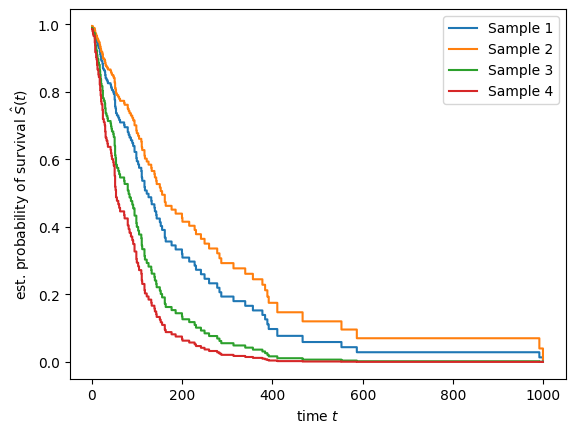

In [15]:
import numpy as np

pred_surv = estimator.predict_survival_function(x_new)
time_points = np.arange(1, 1000)
for i, surv_func in enumerate(pred_surv):
    plt.step(time_points, surv_func(time_points), where="post", label=f"Sample {i + 1}")
plt.ylabel(r"est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

### Perfomance Measurement

cox concordance score:

The interpretation is identical to the traditional area under the ROC curve metric for binary classification: - a value of 0.5 denotes a random model, - a value of 1.0 denotes a perfect model, - a value of 0.0 denotes a perfectly wrong model.

In [16]:
from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(data_x_numeric)
result = concordance_index_censored(data_y["Status"], data_y["Survival_in_days"], prediction)
result[0]

0.7362562471603816

In [18]:
# or you can use score

estimator.score(data_x_numeric, data_y)


0.7362562471603816

# Intersted for another use case( churn prediction)?

https://www.databricks.com/notebooks/telco-accel/03_cox_proportional_hazards.html